# Raw GDP datasets Exploratory Data Analysis and Processing
This notebook performs performs EDA and processing on raw GDP datasets contained in `..\data\raw\gdp`.

## Step 0: Import and Read Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)
os.makedirs('../plots/single_eda', exist_ok=True)

In [3]:
df_gdp_annual_growth_wb = pd.read_csv(
    "../data/raw/gdp/gdp_annual_growth_percentage.csv",
    skiprows=4,
    skip_blank_lines=True
)
df_gdp_wb = pd.read_csv(
    "../data/raw/gdp/gdp_constant_USD2015.csv",
    skiprows=4,
    skip_blank_lines=True
)
df_gdp_per_capita_wb = pd.read_csv(
    "../data/raw/gdp/gdp_per_capita_constant_PPP.csv",
    skiprows=4,
    skip_blank_lines=True
)
df_gdp_per_capita_owid = pd.read_csv('../data/raw/gdp/gdp-per-capita-worldbank.csv')

 ---

## Step 1: Data Understanding
Inspect Dataframes using `info()`, `head()` and `describe()`.

Below the three datasets from ["WorldBank"](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) are explored. It can be seen that the format is different than the ["OurWorldInData"](https://ourworldindata.org/grapher/gdp-per-capita-worldbank) datasets (both CO2 emissions and GDP), since they contain a column for each year and not a single 'Year' column as in OWID. Therefore in the Data Processing phase, these three datasets are converted in the same 'Year' coulumn format, to ensure consistency. 

### 1.1 World Bank
GDP annual growth in percentage

In [4]:
df_gdp_annual_growth_wb.info()

<class 'pandas.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    str    
 1   Country Code    266 non-null    str    
 2   Indicator Name  266 non-null    str    
 3   Indicator Code  266 non-null    str    
 4   1960            0 non-null      float64
 5   1961            145 non-null    float64
 6   1962            152 non-null    float64
 7   1963            152 non-null    float64
 8   1964            152 non-null    float64
 9   1965            152 non-null    float64
 10  1966            155 non-null    float64
 11  1967            159 non-null    float64
 12  1968            160 non-null    float64
 13  1969            160 non-null    float64
 14  1970            160 non-null    float64
 15  1971            184 non-null    float64
 16  1972            184 non-null    float64
 17  1973            184 non-null    float64
 18  1

In [5]:
df_gdp_annual_growth_wb['Indicator Code'].unique()

<StringArray>
['NY.GDP.MKTP.KD.ZG']
Length: 1, dtype: str

In [6]:
df_gdp_annual_growth_wb['Indicator Name'].unique()

<StringArray>
['GDP growth (annual %)']
Length: 1, dtype: str

`Indicator Code` and `Indicator Name` columns can be removed.

### 1.2 World Bank
GDP per capita 

In [7]:
df_gdp_per_capita_wb.info()

<class 'pandas.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    str    
 1   Country Code    266 non-null    str    
 2   Indicator Name  266 non-null    str    
 3   Indicator Code  266 non-null    str    
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            0 non-null      float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973            0 non-null      float64
 18  1

### 1.3 World Bank
GDP 

In [8]:
df_gdp_wb.info()

<class 'pandas.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    str    
 1   Country Code    266 non-null    str    
 2   Indicator Name  266 non-null    str    
 3   Indicator Code  266 non-null    str    
 4   1960            145 non-null    float64
 5   1961            152 non-null    float64
 6   1962            152 non-null    float64
 7   1963            152 non-null    float64
 8   1964            152 non-null    float64
 9   1965            154 non-null    float64
 10  1966            158 non-null    float64
 11  1967            159 non-null    float64
 12  1968            159 non-null    float64
 13  1969            159 non-null    float64
 14  1970            182 non-null    float64
 15  1971            182 non-null    float64
 16  1972            182 non-null    float64
 17  1973            182 non-null    float64
 18  1

 ---
### 1.4 Our World In Data (OWID)
GDP per capita

In [9]:
df_gdp_per_capita_owid.info()

<class 'pandas.DataFrame'>
RangeIndex: 7240 entries, 0 to 7239
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Entity                          7240 non-null   str    
 1   Code                            7240 non-null   str    
 2   Year                            7240 non-null   int64  
 3   GDP per capita                  7240 non-null   float64
 4   World region according to OWID  6785 non-null   str    
dtypes: float64(1), int64(1), str(3)
memory usage: 282.9 KB


This format (OWID) is cleaner.

 ---
## Step 2: Data Preparation
Convert datasets from WorldBank format (a column for each year), to OurWorldInData format (a column 'Year').

The three datasets are merged into `df_gdp_wb_merged` and, finally, the latter is splitted into:
- Countries only: `df_gdp_countries` 
- Other aggregates: `df_gdp_aggregates`.

### 2.1 WorldBank
GDP annual growth in percentage from WB format to OWID format

In [10]:
#remove unnamed columns
df_gdp_annual_growth_wb = df_gdp_annual_growth_wb.loc[:, ~df_gdp_annual_growth_wb.columns.str.contains("^Unnamed")]
df_gdp_annual_growth_wb.drop(columns=["Indicator Name", "Indicator Code"], inplace=True)

#transform the DataFrame from wide to long format
df_gdp_annual_growth_wb_to_owid = df_gdp_annual_growth_wb.melt(
    id_vars=["Country Name", "Country Code"], # columns to keep
    var_name="Year", # name for the new column
    value_name="GDP growth (annual %)" # name for the new value column
)

# convert the "Year" column to numeric and sort the DataFrame by "Country Name" and "Year"
# coercing errors to NaN and then dropping rows with NaN in "Year"
df_gdp_annual_growth_wb_to_owid["Year"] = pd.to_numeric(df_gdp_annual_growth_wb_to_owid["Year"], errors="coerce")
df_gdp_annual_growth_wb_to_owid = df_gdp_annual_growth_wb_to_owid.dropna(subset=["Year"])
df_gdp_annual_growth_wb_to_owid.sort_values(by=["Country Name", "Year"], inplace=True)
df_gdp_annual_growth_wb_to_owid.head()

,Country Name,Country Code,Year,GDP growth (annual %)
2,Afghanistan,AFG,1960,NaN
268,Afghanistan,AFG,1961,NaN
534,Afghanistan,AFG,1962,NaN
800,Afghanistan,AFG,1963,NaN
1066,Afghanistan,AFG,1964,NaN


In [11]:
df_gdp_annual_growth_wb_to_owid.info()

<class 'pandas.DataFrame'>
Index: 17290 entries, 2 to 17289
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country Name           17290 non-null  str    
 1   Country Code           17290 non-null  str    
 2   Year                   17290 non-null  int64  
 3   GDP growth (annual %)  14133 non-null  float64
dtypes: float64(1), int64(1), str(2)
memory usage: 675.4 KB


### 2.2 WorldBank
GDP per capita from WB format to OWID format

In [12]:
#remove unnamed columns
df_gdp_per_capita_wb = df_gdp_per_capita_wb.loc[:, ~df_gdp_per_capita_wb.columns.str.contains("^Unnamed")]
df_gdp_per_capita_wb.drop(columns=["Indicator Name", "Indicator Code"], inplace=True)

#transform the DataFrame from wide to long format
df_gdp_per_capita_wb_to_owid = df_gdp_per_capita_wb.melt(
    id_vars=["Country Name", "Country Code"], # columns to keep
    var_name="Year", # name for the new column
    value_name="GDP per capita" # name for the new value column
)

# convert the "Year" column to numeric and sort the DataFrame by "Country Name" and "Year"
# coercing errors to NaN and then dropping rows with NaN in "Year"
df_gdp_per_capita_wb_to_owid["Year"] = pd.to_numeric(df_gdp_per_capita_wb_to_owid["Year"], errors="coerce")
df_gdp_per_capita_wb_to_owid = df_gdp_per_capita_wb_to_owid.dropna(subset=["Year"])
df_gdp_per_capita_wb_to_owid.sort_values(by=["Country Name", "Year"], inplace=True)
df_gdp_per_capita_wb_to_owid.head()

,Country Name,Country Code,Year,GDP per capita
2,Afghanistan,AFG,1960,NaN
268,Afghanistan,AFG,1961,NaN
534,Afghanistan,AFG,1962,NaN
800,Afghanistan,AFG,1963,NaN
1066,Afghanistan,AFG,1964,NaN


In [13]:
df_gdp_per_capita_wb_to_owid.info()

<class 'pandas.DataFrame'>
Index: 17290 entries, 2 to 17289
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    17290 non-null  str    
 1   Country Code    17290 non-null  str    
 2   Year            17290 non-null  int64  
 3   GDP per capita  8465 non-null   float64
dtypes: float64(1), int64(1), str(2)
memory usage: 675.4 KB


### 2.3 WorldBank
GDP from WB format to OWID format

In [14]:
#remove unnamed columns
df_gdp_wb = df_gdp_wb.loc[:, ~df_gdp_wb.columns.str.contains("^Unnamed")]
df_gdp_wb.drop(columns=["Indicator Name", "Indicator Code"], inplace=True)

#transform the DataFrame from wide to long format
df_gdp_wb_to_owid = df_gdp_wb.melt(
    id_vars=["Country Name", "Country Code"], # columns to keep
    var_name="Year", # name for the new column
    value_name="GDP" # name for the new value column
)

# convert the "Year" column to numeric and sort the DataFrame by "Country Name" and "Year"
# coercing errors to NaN and then dropping rows with NaN in "Year"
df_gdp_wb_to_owid["Year"] = pd.to_numeric(df_gdp_wb_to_owid["Year"], errors="coerce")
df_gdp_wb_to_owid = df_gdp_wb_to_owid.dropna(subset=["Year"])
df_gdp_wb_to_owid.sort_values(by=["Country Name", "Year"], inplace=True)
df_gdp_wb_to_owid.head()

,Country Name,Country Code,Year,GDP
2,Afghanistan,AFG,1960,NaN
268,Afghanistan,AFG,1961,NaN
534,Afghanistan,AFG,1962,NaN
800,Afghanistan,AFG,1963,NaN
1066,Afghanistan,AFG,1964,NaN


In [15]:
df_gdp_wb_to_owid.info()

<class 'pandas.DataFrame'>
Index: 17290 entries, 2 to 17289
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  17290 non-null  str    
 1   Country Code  17290 non-null  str    
 2   Year          17290 non-null  int64  
 3   GDP           14306 non-null  float64
dtypes: float64(1), int64(1), str(2)
memory usage: 675.4 KB


Now the three datasets from WB have been converted to OWID format with 'Year' column.


 ---
### 2.4 Dataset Merging
Below the three converted datasets are merged into a single dataset `df_gdp_wb_merged`.

In [16]:
df_gdp_wb_partial_merge = pd.merge(
    df_gdp_wb_to_owid,
    df_gdp_per_capita_wb_to_owid,
    on=["Country Name", "Country Code", "Year"],
    how="outer", # keep all rows from both DataFrames even if there is no match or NaNs
)
df_gdp_wb_partial_merge.info()

<class 'pandas.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    17290 non-null  str    
 1   Country Code    17290 non-null  str    
 2   Year            17290 non-null  int64  
 3   GDP             14306 non-null  float64
 4   GDP per capita  8465 non-null   float64
dtypes: float64(2), int64(1), str(2)
memory usage: 675.5 KB


In [17]:
df_gdp_wb_merged = pd.merge(
    df_gdp_wb_partial_merge,
    df_gdp_annual_growth_wb_to_owid,
    on=["Country Name", "Country Code", "Year"],
    how="outer",
)
df_gdp_wb_merged.info()

<class 'pandas.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country Name           17290 non-null  str    
 1   Country Code           17290 non-null  str    
 2   Year                   17290 non-null  int64  
 3   GDP                    14306 non-null  float64
 4   GDP per capita         8465 non-null   float64
 5   GDP growth (annual %)  14133 non-null  float64
dtypes: float64(3), int64(1), str(2)
memory usage: 810.6 KB


Quick check to ensure data in WB are the same as OWID:

In [18]:
TOLERANCE = 0.015
temp_df_comparison = pd.merge(
    df_gdp_wb_merged,
    df_gdp_per_capita_owid,
    left_on=["Country Code", "Year"],
    right_on=["Code", "Year"],       
    suffixes=('_wb', '_owid'),       
    how='inner' # keep only rows that have a match in both DataFrames
    )

temp_df_comparison['diff_absolute'] = temp_df_comparison['GDP per capita_wb'] - temp_df_comparison['GDP per capita_owid']
temp_df_comparison['is_different'] = temp_df_comparison['diff_absolute'].abs() > TOLERANCE
temp_df_comparison['is_different'].value_counts()

is_different
False    6768
Name: count, dtype: int64

Here is confirmed that OWID data where taken from `gdp_per_capita_constant_PPP.csv` therefore we can use the new merged DataFrame `df_gdp_wb_merged` created from WorlBank data.

Remove unnecessary rows (where all GDP, GDP Per Capita and GDP growth is NaN).

In [19]:
df_gdp_wb_merged.info()

<class 'pandas.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country Name           17290 non-null  str    
 1   Country Code           17290 non-null  str    
 2   Year                   17290 non-null  int64  
 3   GDP                    14306 non-null  float64
 4   GDP per capita         8465 non-null   float64
 5   GDP growth (annual %)  14133 non-null  float64
dtypes: float64(3), int64(1), str(2)
memory usage: 810.6 KB


In [20]:
df_gdp_wb_merged = df_gdp_wb_merged.dropna(subset=['GDP', 'GDP per capita', 'GDP growth (annual %)'], how='all')
df_gdp_wb_merged.info()

<class 'pandas.DataFrame'>
Index: 14394 entries, 40 to 17289
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country Name           14394 non-null  str    
 1   Country Code           14394 non-null  str    
 2   Year                   14394 non-null  int64  
 3   GDP                    14306 non-null  float64
 4   GDP per capita         8465 non-null   float64
 5   GDP growth (annual %)  14133 non-null  float64
dtypes: float64(3), int64(1), str(2)
memory usage: 787.2 KB


 ---
### 2.5 Separating datasets for countries and continents

This block separates the dataset `df_gdp_wb_merged` into:
- Countries only: `df_gdp_countries` 
- Other aggregates: `df_gdp_aggregates`.


In [21]:
unique_countries = df_gdp_wb_merged['Country Name'].unique()

for country in sorted(unique_countries):
    print(country)

Afghanistan
Africa Eastern and Southern
Africa Western and Central
Albania
Algeria
American Samoa
Andorra
Angola
Antigua and Barbuda
Arab World
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas, The
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Caribbean small states
Cayman Islands
Central African Republic
Central Europe and the Baltics
Chad
Channel Islands
Chile
China
Colombia
Comoros
Congo, Dem. Rep.
Congo, Rep.
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Curacao
Cyprus
Czechia
Denmark
Djibouti
Dominica
Dominican Republic
Early-demographic dividend
East Asia & Pacific
East Asia & Pacific (IDA & IBRD countries)
East Asia & Pacific (excluding high income)
Ecuador
Egypt, Arab Rep.
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Euro area
Europe & Central Asia
Europe & Central Asia (IDA & IBRD countries)
Europe &

Split the dataset into countries and non-countries

In [22]:
# list of non country aggregates to separate from the main dataset
aggregates_list = [ "Africa Eastern and Southern", "Africa Western and Central", "Arab World", "Caribbean small states", 
    "Central Europe and the Baltics", "Early-demographic dividend", "East Asia & Pacific", 
    "East Asia & Pacific (IDA & IBRD countries)", "East Asia & Pacific (excluding high income)", "Euro area", 
    "Europe & Central Asia", "Europe & Central Asia (IDA & IBRD countries)", "Europe & Central Asia (excluding high income)", 
    "European Union", "Fragile and conflict affected situations", "Heavily indebted poor countries (HIPC)", "High income", 
    "IBRD only", "IDA & IBRD total", "IDA blend", "IDA only", "IDA total", "Late-demographic dividend", "Latin America & Caribbean", 
    "Latin America & Caribbean (excluding high income)", "Latin America & the Caribbean (IDA & IBRD countries)", 
    "Least developed countries: UN classification", "Low & middle income", "Low income", "Lower middle income", "Middle East, "
    "North Africa, Afghanistan & Pakistan", "Middle East, North Africa, Afghanistan & Pakistan (IDA & IBRD)", 
    "Middle East, North Africa, Afghanistan & Pakistan (excluding high income)", "Middle income", "North America", 
    "Not classified", "OECD members", "Other small states", "Pacific island small states", "Post-demographic dividend", 
    "Pre-demographic dividend", "Small states", "South Asia", "South Asia (IDA & IBRD)", "Sub-Saharan Africa", 
    "Sub-Saharan Africa (IDA & IBRD countries)", "Sub-Saharan Africa (excluding high income)", "Upper middle income", "World"
]

# take everything that is NOT in the aggregates list as nations, and everything that IS in the aggregates list as aggregates
df_gdp_countries_no_continent = df_gdp_wb_merged[~df_gdp_wb_merged['Country Name'].isin(aggregates_list)].copy()
df_gdp_aggregates = df_gdp_wb_merged[df_gdp_wb_merged['Country Name'].isin(aggregates_list)].copy()

print(f"Total rows original: {len(df_gdp_wb_merged)}")
print(f"Rows Nations: {len(df_gdp_countries_no_continent)}")
print(f"Rows Aggregates: {len(df_gdp_aggregates)}")

# Quick check
print("\nExample Nations remaining:")
print(df_gdp_countries_no_continent['Country Name'].unique()[:10])

Total rows original: 14394
Rows Nations: 11427
Rows Aggregates: 2967

Example Nations remaining:
<StringArray>
[        'Afghanistan',             'Albania',             'Algeria',
      'American Samoa',             'Andorra',              'Angola',
 'Antigua and Barbuda',           'Argentina',             'Armenia',
               'Aruba']
Length: 10, dtype: str


In [23]:
df_gdp_per_capita_owid.info()

<class 'pandas.DataFrame'>
RangeIndex: 7240 entries, 0 to 7239
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Entity                          7240 non-null   str    
 1   Code                            7240 non-null   str    
 2   Year                            7240 non-null   int64  
 3   GDP per capita                  7240 non-null   float64
 4   World region according to OWID  6785 non-null   str    
dtypes: float64(1), int64(1), str(3)
memory usage: 282.9 KB


In [24]:
df_gdp_per_capita_owid_only_code_region = df_gdp_per_capita_owid.drop(columns=['Entity', 'GDP per capita', 'Year'], errors='ignore').drop_duplicates()
df_gdp_per_capita_owid_only_code_region.head(10)

,Code,World region according to OWID
0,AFG,Asia
24,ALB,Europe
59,DZA,Africa
94,AND,Europe
129,AGO,Africa
164,ATG,North America
199,ARG,South America
234,ARM,Asia
269,ABW,North America
304,AUS,Oceania


In [25]:
df_gdp_countries = df_gdp_countries_no_continent.merge(
    df_gdp_per_capita_owid_only_code_region,
    left_on=['Country Code'],
    right_on=['Code'],
    how='left'
)
df_gdp_countries.drop(columns=['Code'], inplace=True)
df_gdp_countries.rename(columns={'World region according to OWID': 'Continent'}, inplace=True)
df_gdp_countries.head()

,Country Name,Country Code,Year,GDP,GDP per capita,GDP growth (annual %),Continent
0,Afghanistan,AFG,2000,6.206548e+09,1617.826475,NaN,Asia
1,Afghanistan,AFG,2001,5.621148e+09,1454.110782,-9.431974,Asia
2,Afghanistan,AFG,2002,7.228796e+09,1774.308743,28.600001,Asia
3,Afghanistan,AFG,2003,7.867263e+09,1815.928200,8.832278,Asia
4,Afghanistan,AFG,2004,7.978516e+09,1776.918207,1.414118,Asia


Dataset containing only geographical regions:

In [26]:
# regions = [
#     "Africa Eastern and Southern",
#     "Africa Western and Central",
#     "East Asia & Pacific",
#     "European Union",
#     "Latin America & Caribbean",
#     "Middle East, North Africa, Afghanistan & Pakistan",
#     "North America",
#     "Sub-Saharan Africa",
#     "South Asia"
# ]
# df_gdp_regions = df_gdp_aggregates[df_gdp_aggregates['Country Name'].isin(regions)]
# df_gdp_regions.head()

Dataset based on income:

In [27]:
# income = [
#     "High income",
#     "Low & middle income",
#     "Low income",
#     "Lower middle income",
#     "Middle income",
#     "Upper middle income"
# ]
# df_gdp_income = df_gdp_aggregates[df_gdp_aggregates['Country Name'].isin(income)]
# df_gdp_income.head()

 ---
## Step 3: Feature Understanding
Plotting feature distributions using geographical plots.
Below three plots are created from the `df_gdp_countries` DataFrame:
- Global GDP Over Time
- Global GDP Per Capita Over Time
- Annual GDP Growth (%) Over Time

In [28]:
df_gdp_countries.info()

<class 'pandas.DataFrame'>
RangeIndex: 11427 entries, 0 to 11426
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country Name           11427 non-null  str    
 1   Country Code           11427 non-null  str    
 2   Year                   11427 non-null  int64  
 3   GDP                    11339 non-null  float64
 4   GDP per capita         6785 non-null   float64
 5   GDP growth (annual %)  11214 non-null  float64
 6   Continent              10911 non-null  str    
dtypes: float64(3), int64(1), str(3)
memory usage: 625.0 KB


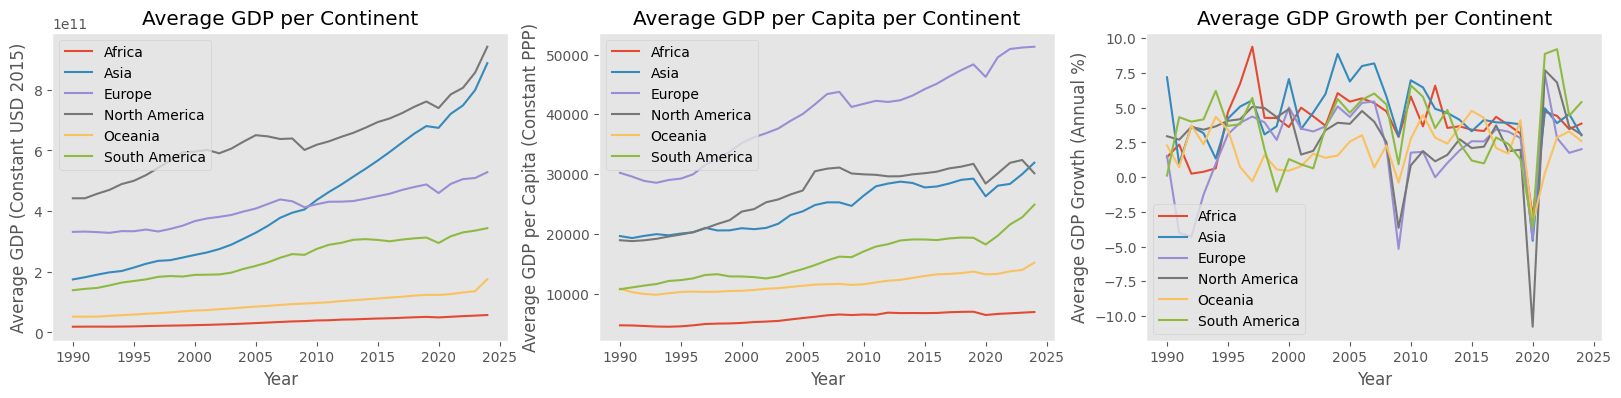

In [29]:
df_gdp_countries_means = df_gdp_countries.groupby(["Continent", "Year"]).agg({"GDP": "mean", "GDP per capita": "mean", "GDP growth (annual %)": "mean"})
df_gdp_countries_means.dropna(inplace=True)
df_gdp_countries_means.reset_index(inplace=True)

fig, axes = plt.subplots(1, 3, figsize=(20, 4))

# GDP overtime by continent
for continent in df_gdp_countries_means['Continent'].unique():
    continent_data = df_gdp_countries_means[df_gdp_countries_means['Continent'] == continent]
    axes[0].plot(continent_data['Year'], continent_data['GDP'], label=continent )
axes[0].set_title('Average GDP per Continent')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Average GDP (Constant USD 2015)')
axes[0].legend()
axes[0].grid()

# GDP per capita overtime by continent
for continent in df_gdp_countries_means['Continent'].unique():
    continent_data = df_gdp_countries_means[df_gdp_countries_means['Continent'] == continent]
    axes[1].plot(continent_data['Year'], continent_data['GDP per capita'], label=continent)
axes[1].set_title('Average GDP per Capita per Continent')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average GDP per Capita (Constant PPP)')
axes[1].legend()
axes[1].grid()

# GDP growth overtime by continent
for continent in df_gdp_countries_means['Continent'].unique():
    continent_data = df_gdp_countries_means[df_gdp_countries_means['Continent'] == continent]
    axes[2].plot(continent_data['Year'], continent_data['GDP growth (annual %)'], label=continent)
axes[2].set_title('Average GDP Growth per Continent')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Average GDP Growth (Annual %)')
axes[2].legend()
axes[2].grid()
plt.savefig('../plots/single_eda/gdp_continents.png')
plt.show()


 ---
## 4. Data Saving
Saving the DataFrames into `..\data\processed\`.
- `df_gdp_countries` --> `..\data\processed\gdp_countries.csv`

In [30]:
df_gdp_countries.to_csv('../data/processed/gdp_countries.csv', index=False)